# Model 1 Fine Tuning


**Name:** Kavin Fidel <br>

**ID.:** 210200007 <br>
**Model** InceptionResNetV2

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(41)

import numpy as np
np.random.seed(41)

import matplotlib.pyplot as plt
%matplotlib inline

2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# load numpy array from npy file
from numpy import load

X_train_std = load("/content/drive/MyDrive/Deep Learning/Models/X_train1_std.npy")
X_test_std = load("/content/drive/MyDrive/Deep Learning/Models/X_test1_std.npy")

y_train = load("/content/drive/MyDrive/Deep Learning/Models/y_train1.npy")
y_test = load("/content/drive/MyDrive/Deep Learning/Models/y_test1.npy")


In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (637, 299, 299, 3)
X_test_std_shape: (213, 299, 299, 3)


In [5]:
# Load the saved best model

model1_FT = keras.models.load_model("/content/drive/MyDrive/Deep Learning/Models/Model1_TL.h5")
model1_FT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

In [6]:
tot_layers = len(model1_FT.layers)
freeze_layer = round(tot_layers * 0.25)

for layer in model1_FT.layers[:freeze_layer]:
  layer.trainable = False

for layer in model1_FT.layers[freeze_layer:]:
  layer.trainable = True


In [7]:
model1_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks1_FT = [
             keras.callbacks.ModelCheckpoint("bestFT1.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history1_FT = model1_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks1_FT)

Epoch 1/10
36/36 [==============================] - 109s 819ms/step - loss: 0.8087 - accuracy: 0.9145 - val_loss: 1550732.5000 - val_accuracy: 0.2031
Epoch 2/10
36/36 [==============================] - 16s 456ms/step - loss: 0.2597 - accuracy: 0.9442 - val_loss: 1743.0156 - val_accuracy: 0.2031
Epoch 3/10
36/36 [==============================] - 18s 501ms/step - loss: 0.0837 - accuracy: 0.9825 - val_loss: 163.4076 - val_accuracy: 0.2812
Epoch 4/10
36/36 [==============================] - 18s 494ms/step - loss: 0.0828 - accuracy: 0.9878 - val_loss: 40018.0977 - val_accuracy: 0.2031
Epoch 5/10
36/36 [==============================] - 18s 489ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 210.9487 - val_accuracy: 0.2031
Epoch 6/10
36/36 [==============================] - 17s 467ms/step - loss: 0.0247 - accuracy: 0.9913 - val_loss: 29.5128 - val_accuracy: 0.2188
Epoch 7/10
36/36 [==============================] - 19s 518ms/step - loss: 0.0161 - accuracy: 0.9930 - val_loss: 0.3248 - v

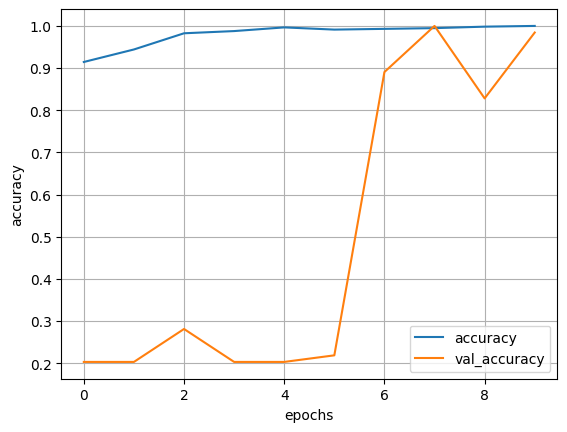

In [8]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history1_FT.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [9]:
testLoss_FT, testAccuracy_FT = model1_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

7/7 [==============================] - 16s 1s/step - loss: 0.0050 - accuracy: 1.0000
Test-loss: 0.005015, Test-accuracy: 1.000000


In [10]:
# Plugging best weights to the model to evaluate

model1_FT.load_weights("bestFT1.h5")

testLoss_FT, testAccuracy_FT = model1_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

7/7 [==============================] - 2s 303ms/step - loss: 1.2122e-04 - accuracy: 1.0000
Test-loss: 0.000121, Test-accuracy: 1.000000


## Prediction of testing sample and inferences

In [11]:
y_proba = model1_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

7/7 [==============================] - 6s 314ms/step
[4 4 2 3 3 0 4 1 1 3 1 1 0 4 4 4 0 0 2 2 1 0 2 0 4 1 4 1 0 4 0 2 0 4 0 2 2
 4 0 0 1 2 2 4 2 1 1 3 2 4 4 3 2 4 3 1 1 0 2 0 2 2 4 0 2 2 0 2 1 0 3 3 4 3
 2 2 1 0 4 4 0 2 0 0 2 4 1 0 4 1 2 4 2 3 4 2 0 4 0 3 3 1 1 4 3 1 2 1 4 1 1
 0 1 1 2 0 2 1 1 3 4 1 2 0 4 2 0 0 2 2 0 1 0 2 4 0 3 0 0 1 4 4 0 1 4 3 2 4
 0 3 1 1 1 1 2 0 0 1 3 4 3 1 4 2 1 4 0 4 2 1 0 1 0 2 1 2 1 0 2 2 0 0 0 0 3
 1 3 2 0 4 1 4 2 0 1 2 2 1 1 1 2 2 0 3 0 2 1 1 4 3 2 1 2]


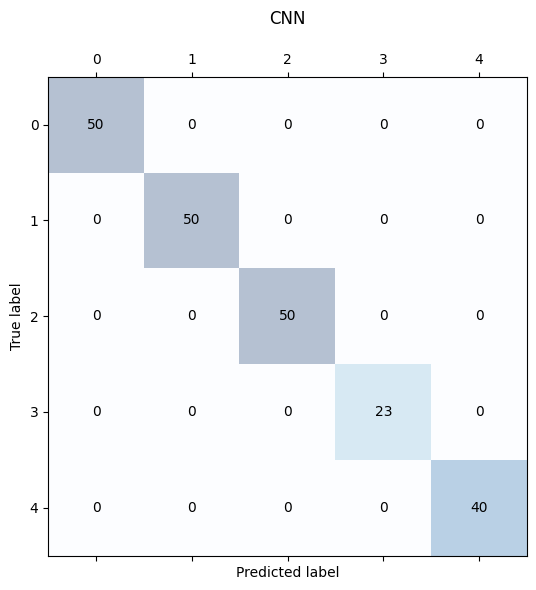

In [12]:
# Confusion matrix of testing data

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [13]:
# Calculating the precision, recall and f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  1.0
Recall:  1.0
F1-score:  1.0


In [14]:
# Saves the best model obtained
model1_FT.save("/content/drive/MyDrive/Deep Learning/Models/Fine_Tuned/Model1_FT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
